In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_diabetes, load_wine, make_blobs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

from sklearn.svm import SVR, SVC

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.cluster import KMeans

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz

## 1. Naive Bayes

+ 조건부 확률
+ 선형 모델과 유사(LogisticRegression, LinearSVC, ...)
+ 훈련 속도는 빠르지만 일반화 성능이 조금 뒤쳐진다.
+ 종류
    - GaussianNB : 연속적인 데이터
    - BernoulliNB : 이산 데이터
    - MultinomialNB : 이산 데이터
+ 파라미터
    - alpha

### (1) GaussianNB

In [28]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)

In [29]:
model = GaussianNB().fit(X_train, y_train)

In [30]:
preds = model.predict(X_test)

In [31]:
print("정확도 : ", accuracy_score(y_test, preds))

정확도 :  0.9666666666666667


In [32]:
confusion_matrix(y_test, preds)

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  7]], dtype=int64)

### (2) MultinomialNB, BernoulliNB

+ 영화 리뷰를 이용한 평가 예측(부정/긍정)

In [2]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [3]:
##### type특성을 숫자로 매핑

df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [4]:
df_X = df["movie_review"]
df_y = df["label"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)
X_traincv

encoded_input = X_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [8]:
##### 단어 사전
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [19]:
cv.inverse_transform([encoded_input[0]])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [20]:
model = MultinomialNB().fit(X_traincv, df_y)

In [21]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

In [22]:
test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})

test_X = test_df["movie_review"]
test_y = test_df["label"]

In [24]:
X_testcv = cv.transform(test_X)
X_testcv

preds = model.predict(X_testcv)

In [25]:
accuracy_score(test_y, preds)

1.0

In [27]:
##### BernouillNB

model2 = BernoulliNB().fit(X_traincv, df_y)

test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})

test_X = test_df["movie_review"]
test_y = test_df["label"]

X_testcv = cv.transform(test_X)
X_testcv

preds = model2.predict(X_testcv)

accuracy_score(test_y, preds)

1.0

+ 스팸 메일 분류

In [28]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

In [29]:
df = pd.DataFrame(email_list)

df["label"] = df["spam"].map({True:1, False:0})

df_X = df["email title"]
df_y = df["label"]

cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)

In [33]:
##### multinomialNB

model1 = MultinomialNB().fit(X_traincv, df_y)

test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})

test_X = test_df["email title"]
test_y = test_df["label"]

X_testcv = cv.transform(test_X)
preds = model1.predict(X_testcv)

accuracy_score(test_y, preds)

0.8333333333333334

In [34]:
##### BernoulliNB

model2 = BernoulliNB().fit(X_traincv, df_y)

test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})

test_X = test_df["email title"]
test_y = test_df["label"]

X_testcv = cv.transform(test_X)
preds = model2.predict(X_testcv)

accuracy_score(test_y, preds)

0.8333333333333334

---

## 2. K-MEANS

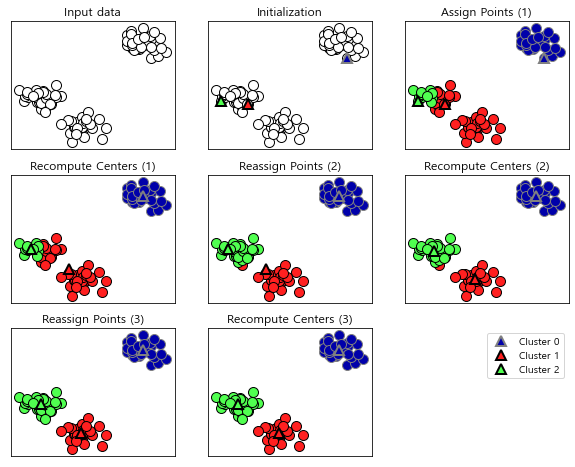

In [39]:
mglearn.plots.plot_kmeans_algorithm()

#### 1) make_blobs 샘플

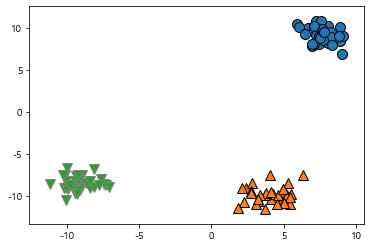

In [44]:
X, y = make_blobs()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [49]:
model = KMeans(n_clusters=5).fit(X)

In [50]:
model.labels_

array([0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 3, 0, 0, 0, 1, 3, 3, 3, 1, 2, 0, 1,
       0, 1, 4, 1, 0, 3, 0, 1, 4, 1, 4, 3, 0, 2, 1, 0, 2, 2, 1, 3, 1, 2,
       1, 4, 0, 0, 1, 2, 3, 2, 0, 3, 1, 4, 1, 0, 2, 1, 0, 0, 3, 4, 1, 2,
       0, 0, 2, 1, 2, 1, 4, 1, 2, 2, 4, 2, 3, 0, 1, 0, 1, 4, 1, 1, 2, 1,
       4, 1, 1, 2, 3, 3, 3, 1, 1, 1, 0, 0])

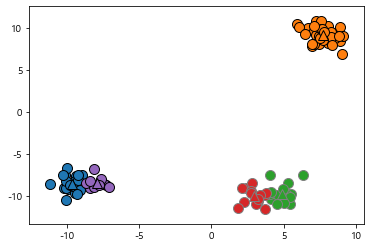

In [54]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
                        [0, 1, 2, 3, 4], markers="^")

#### 2) make_moons 샘플

In [55]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

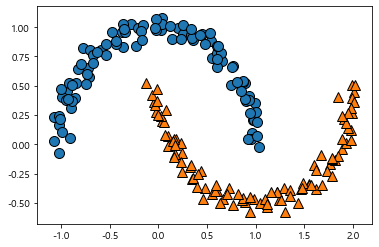

In [56]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [57]:
model = KMeans(n_clusters=2).fit(X)

In [59]:
model.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

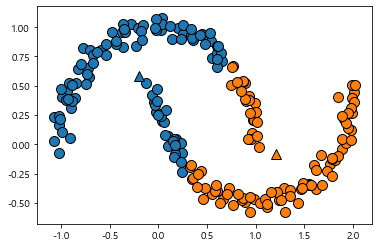

In [61]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
                        [0, 1], markers="^")

In [62]:
preds = model.predict(X)
accuracy_score(y, preds)

0.755

#### 3) iris 샘플

In [64]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

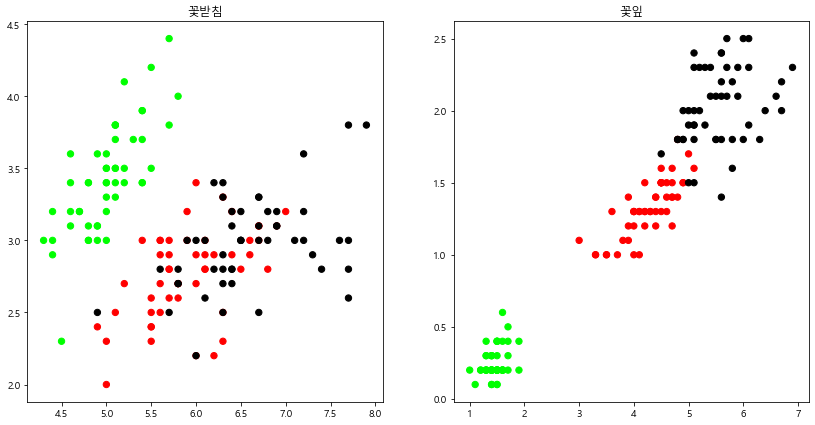

In [66]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [67]:
model = KMeans(n_clusters=3).fit(X)

In [68]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '예측값')

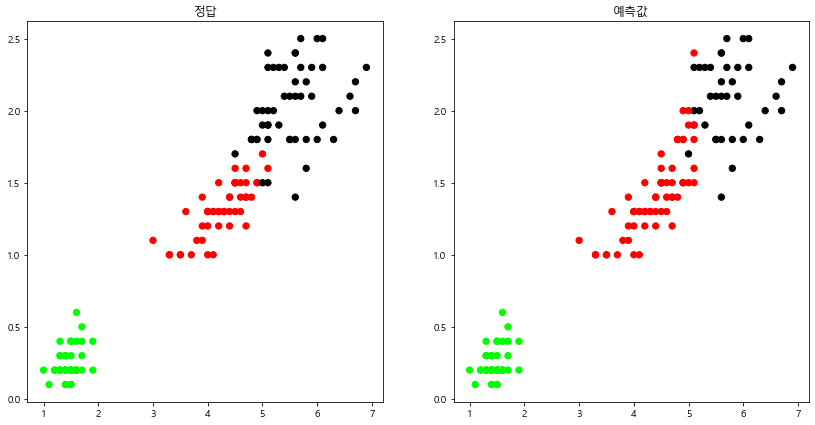

In [70]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("예측값")

In [71]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [72]:
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

#### 4) 사람의 키와 몸무게를 활용 

In [73]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


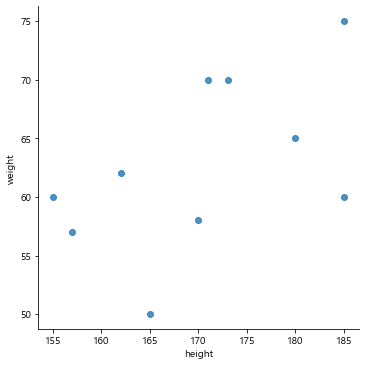

In [74]:
sns.lmplot("height", "weight", data=df, fit_reg=False)

In [75]:
model = KMeans(n_clusters=3).fit(df.values)

In [76]:
df["label"] = model.labels_
df

,height,weight,label
0,185,60,0
1,180,65,0
2,185,75,0
3,165,50,1
4,170,58,1
5,155,60,1
6,157,57,1
7,162,62,1
8,173,70,2
9,171,70,2


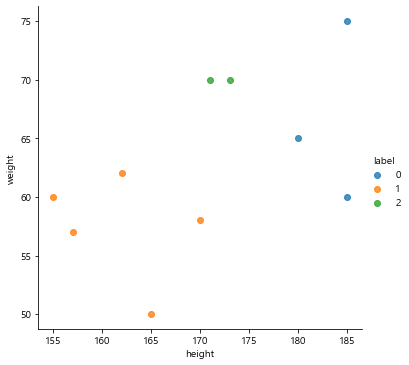

In [77]:
sns.lmplot("height", "weight", data=df, fit_reg=False, hue="label")

---

## 3. 인공 신경망(Artificial Neural Network)